## Intialization

In [1]:
import math

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
import matplotlib.pyplot as plt

## Data Loading

In [2]:
from sklearn.datasets import load_breast_cancer

Cancer = load_breast_cancer()
X = Cancer.data
y = Cancer.target


In [3]:
X.shape, y.shape

((569, 30), (569,))

In [4]:
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [5]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

## Test train splitting

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler().fit(X_train)
X_train, X_test = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

## Naive Bayes Classifiers

In [7]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [8]:
y_pre = model.predict(X_test)
confusion_matrix(y_pre, y_test).T

array([[43,  4],
       [ 3, 64]], dtype=int64)

## Perceptron 

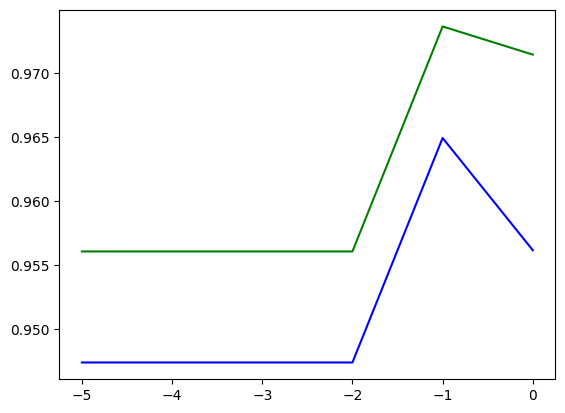

In [9]:
tolerance = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
accuracy_te = []
accuracy_tr = []
for t in tolerance:
    model = Perceptron(tol=t)
    model.fit(X_train, y_train)
    y_pre_tr = model.predict(X_train)
    y_pre_te = model.predict(X_test)
    accuracy_tr.append(accuracy_score(y_train, y_pre_tr))
    accuracy_te.append(accuracy_score(y_test, y_pre_te))

plt.plot(np.log10(tolerance), accuracy_tr, 'g-')
plt.plot(np.log10(tolerance), accuracy_te, 'b-')
plt.show()





Best Tolerance is: 0.1

In [10]:
model = Perceptron(tol=0.1)
model.fit(X_train, y_train)

Perceptron(tol=0.1)

In [11]:
y_pre = model.predict(X_test)
confusion_matrix(y_pre, y_test).T

array([[44,  3],
       [ 1, 66]], dtype=int64)

## Linear Discriminant Analysis

In [12]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [13]:
y_pre = model.predict(X_test)
confusion_matrix(y_pre, y_test).T

array([[40,  7],
       [ 0, 67]], dtype=int64)

## Logestic Regression

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_pre = model.predict(X_test)
confusion_matrix(y_pre, y_test).T

array([[44,  3],
       [ 2, 65]], dtype=int64)